In [ ]:
import os
import matplotlib.pyplot as plt
from aimon import ChangeEventCollection

try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

os.chdir(current_dir)


### Define rules

The structure for the filter rules is:

{
    "feature_name": {"min": value, "max": value}
}

All rules are applied sequentially and combined with OR logic.

In [6]:
# Path to the unlabelled change events test file
change_events_file = "../test_data/change_events_unlabelled.json"
outfolder = "../test_data/out"

# Rule for filtering change events
filter_rule = {
         "change_mean": {"min": 5, "max": 10},
         "hull_volume": {"max": 20}}

# Load the change events
filtered_file = os.path.join(outfolder, 'change_events_filtered_rule_based.json')

### Filter events

In [10]:
coll = ChangeEventCollection().load_from_file(change_events_file)
coll.to_dataframe()
unfiltered_df = coll.df
coll.events = coll.filter_events_rule_based(filter_rule)
coll.save_to_file(filtered_file)

### Visualize remaining data

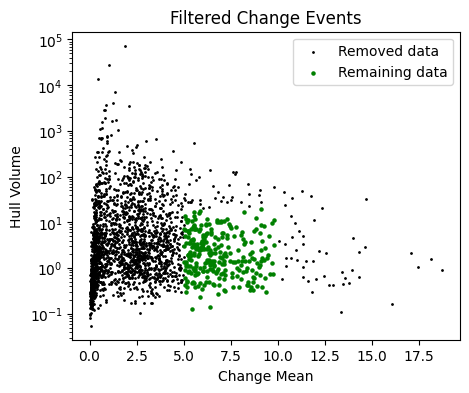

In [17]:
coll.to_dataframe()
plt.figure(figsize=(5, 4))
plt.scatter(unfiltered_df['change_mean'], unfiltered_df['hull_volume'], label='Removed data', s=1, color = 'black')
plt.scatter(coll.df['change_mean'], coll.df['hull_volume'], label='Remaining data', s=5, color = 'green')

plt.yscale('log')
plt.legend()
plt.xlabel('Change Mean')
plt.ylabel('Hull Volume')
plt.title('Filtered Change Events')
plt.show()